In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# reading files

In [2]:
data = pd.read_csv("C:/Users/kaige/Desktop/files/t1.csv")

In [3]:
data.head(5)

,Date,Hour,Minute,Second,Voltage,Id
0,2019/1/8,23,36,2,240,96
1,2019/1/8,23,44,49,238,96
2,2019/1/8,23,45,49,238,96
3,2019/1/8,23,46,49,239,96
4,2019/1/8,23,47,49,238,96


In [4]:
data.shape

(1048575, 6)

# group  by date

In [5]:
group_date = data.groupby(['Id', 'Date'])['Voltage'].mean()
group_date = group_date.reset_index()  # framed
group_date['DateTime'] = pd.to_datetime(group_date['Date']) # format: timestamp
# group_date = group_date.groupby(['Id']).sort_values(by='Date', ascending=True)
date = group_date['Date']
group_date = group_date.drop(['Date'], axis = 1)

In [6]:
group_date.shape

(760, 3)

In [7]:
group_date.head(5)

,Id,Voltage,DateTime
0,4,243.687597,2019-01-11
1,4,243.136206,2019-01-12
2,4,243.043115,2019-01-13
3,4,243.517026,2019-01-14
4,4,243.216423,2019-01-15


In [8]:
group_date[group_date['Id'] == 96]

,Id,Voltage,DateTime
697,96,237.524109,2019-01-10
698,96,242.815716,2019-01-11
699,96,241.112578,2019-01-12
700,96,240.478079,2019-01-13
701,96,241.436111,2019-01-14
702,96,240.565369,2019-01-15
703,96,240.593185,2019-01-16
704,96,242.268428,2019-01-17
705,96,241.112578,2019-01-18
706,96,241.167594,2019-01-19


### write to excel

In [9]:
group_date.to_excel('C:/Users/kaige/Desktop/files/groupedby_date.xls', encoding='utf-8')

In [10]:
data_date = group_date.drop(['DateTime'], axis = 1).values.copy()

In [11]:
data_date

array([[  4.        , 243.6875969 ],
       [  4.        , 243.1362057 ],
       [  4.        , 243.04311544],
       ...,
       [ 99.        , 237.39819319],
       [ 99.        , 237.12656467],
       [ 99.        , 234.57817929]])

In [12]:
type(group_date['DateTime'])

pandas.core.series.Series

# plot figure grouped by date

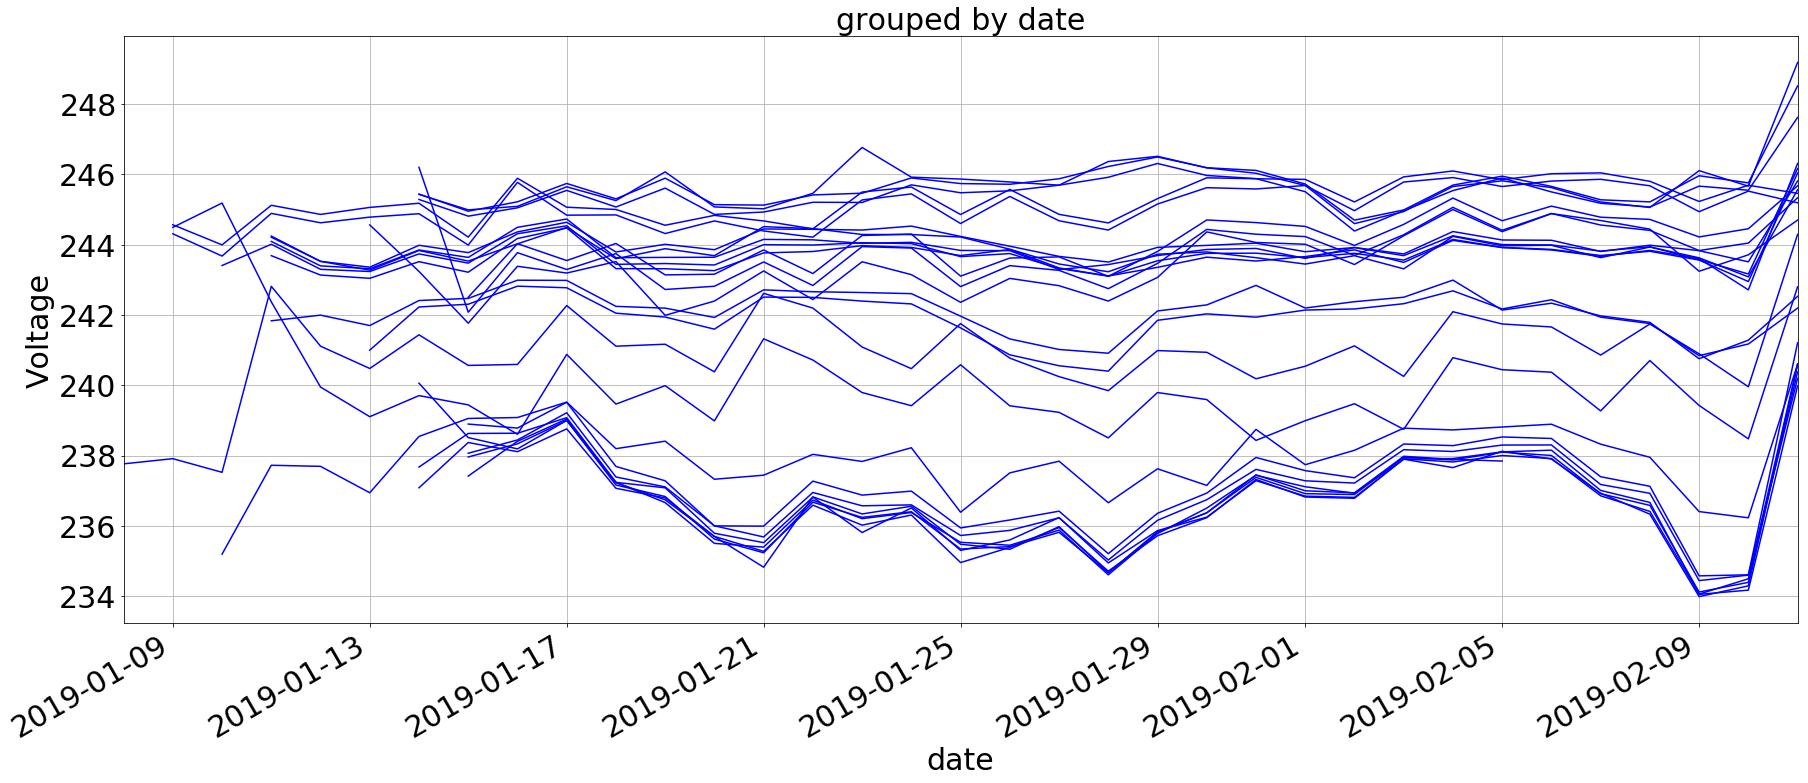

In [13]:
id_list = group_date['Id'].drop_duplicates().tolist()
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    rows.plot('DateTime', 'Voltage', kind = 'line',color = 'blue', ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 30)

plt.title('grouped by date', fontsize = 30)
plt.xlabel('date', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# grouped by hour

In [14]:
group_hour = data.groupby(['Id', 'Hour'])['Voltage'].mean()
group_hour = group_hour.reset_index()
# group_hour = group_hour.sort_values(by='Hour', ascending=True)

In [15]:
group_hour.shape

(600, 3)

In [16]:
group_hour.head(5)

,Id,Hour,Voltage
0,4,0,244.472581
1,4,1,245.396561
2,4,2,245.148088
3,4,3,245.051419
4,4,4,244.917742


In [17]:
group_hour.to_excel('C:/Users/kaige/Desktop/files/groupedby_hour.xls', encoding='utf-8')

In [18]:
data_hour = group_hour.values.copy()

# plot figure grouped by hour

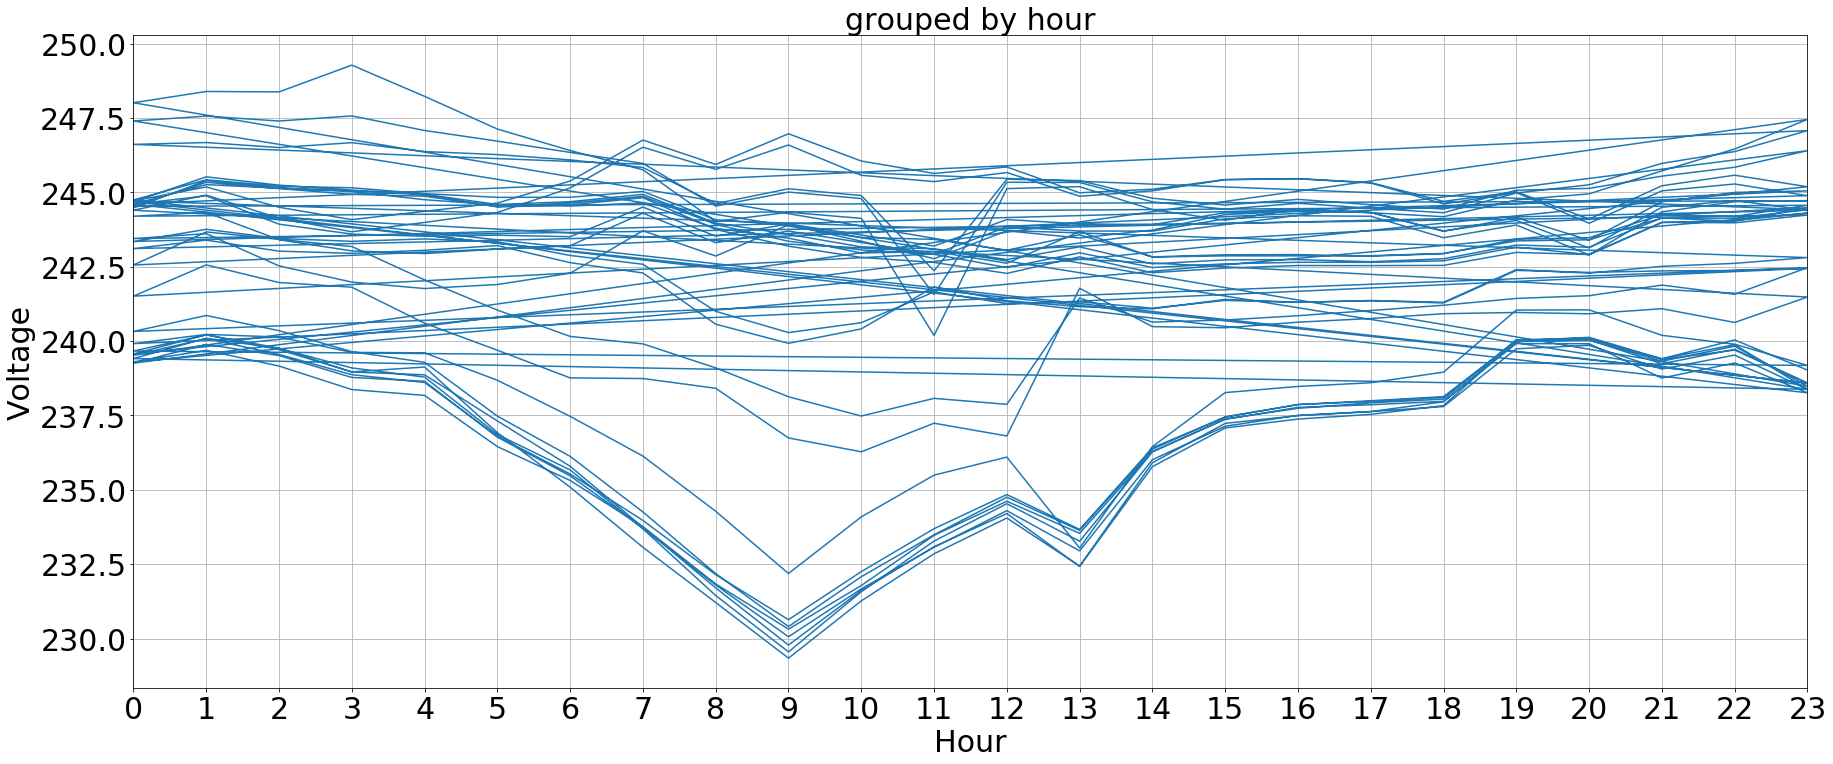

In [19]:
group_hour.plot('Hour', 'Voltage', kind = 'line', legend = False, grid = True, figsize = (30, 12), xticks = range(0,24), fontsize = 30)
plt.title('grouped by hour', fontsize = 30)
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Date, k-means

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [21]:
arrs = date.values
arrs = [arrs]

In [22]:
# using one-hot-encoding
from sklearn.preprocessing import OneHotEncoder

# character: date 
encoder = OneHotEncoder()
encoder.fit(arrs)
encoder_vector = encoder.transform(arrs).toarray()

In [23]:
clinski_harabaz_scores = []
cluster_num = range(2, 35)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    data_train = np.concatenate((data_date, encoder_vector.T), axis = 1)
    predict = kmeans.fit_predict(data_train)
    clinski_harabaz_scores.append(metrics.calinski_harabaz_score(data_train, predict))
    

In [24]:
clinski_harabaz_scores

[1907.1469642601876,
 3551.4965401836457,
 4629.107668123743,
 4939.699033731592,
 4890.727779637384,
 5391.997023853354,
 5705.504436130595,
 6240.717231873956,
 7129.0445453507045,
 8311.45623322652,
 9671.524144625071,
 11262.915651986232,
 13467.193481509246,
 16009.660084353662,
 17644.294565337234,
 19770.849918084605,
 23131.553901893443,
 26482.995339477442,
 28794.116623862716,
 30140.754989643337,
 31608.74124818758,
 31578.301722326207,
 33108.93513694103,
 33436.83674278638,
 32954.21324676278,
 33466.59465361061,
 33931.33973069859,
 33855.67501629913,
 34006.85513776077,
 34997.51500504556,
 35697.905027575966,
 35058.238148076634,
 35680.96316538605]

<function matplotlib.pyplot.show(*args, **kw)>

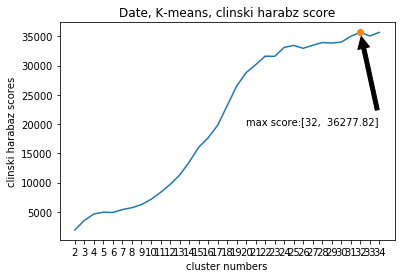

In [29]:
fig = plt.figure()
x = range(2,35)
plt.plot(x, clinski_harabaz_scores)
plt.xlabel('cluster numbers')
plt.xticks(range(2, 35))
plt.ylabel('clinski harabaz scores')
plt.title('Date, K-means, clinski harabz score')  # score with diff cluster numbers
max_clin = max(clinski_harabaz_scores)
max_clin_index = clinski_harabaz_scores.index(max(clinski_harabaz_scores)) + 2
plt.plot([max_clin_index], [max_clin], 'o')
plt.annotate('max score:[32,  36277.82]', xy = (max_clin_index, max_clin), xytext = (20,20000),
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.show

### cluster numbers = 4

In [78]:
kmeans = KMeans(n_clusters = 4, n_jobs = 4)
predict = kmeans.fit_predict(data_train)

In [79]:
group_date['cluster_kmeans'] = predict

In [80]:
group_date[group_date['Id'] == 96]

,Id,Voltage,DateTime,cluster_kmeans,cluster_meanShift,cluster_DBSCAN
697,96,237.524109,2019-01-10,2,2,-1
698,96,242.815716,2019-01-11,2,2,-1
699,96,241.112578,2019-01-12,2,2,-1
700,96,240.478079,2019-01-13,2,2,-1
701,96,241.436111,2019-01-14,2,2,-1
702,96,240.565369,2019-01-15,2,2,-1
703,96,240.593185,2019-01-16,2,2,-1
704,96,242.268428,2019-01-17,2,2,-1
705,96,241.112578,2019-01-18,2,2,-1
706,96,241.167594,2019-01-19,2,2,-1


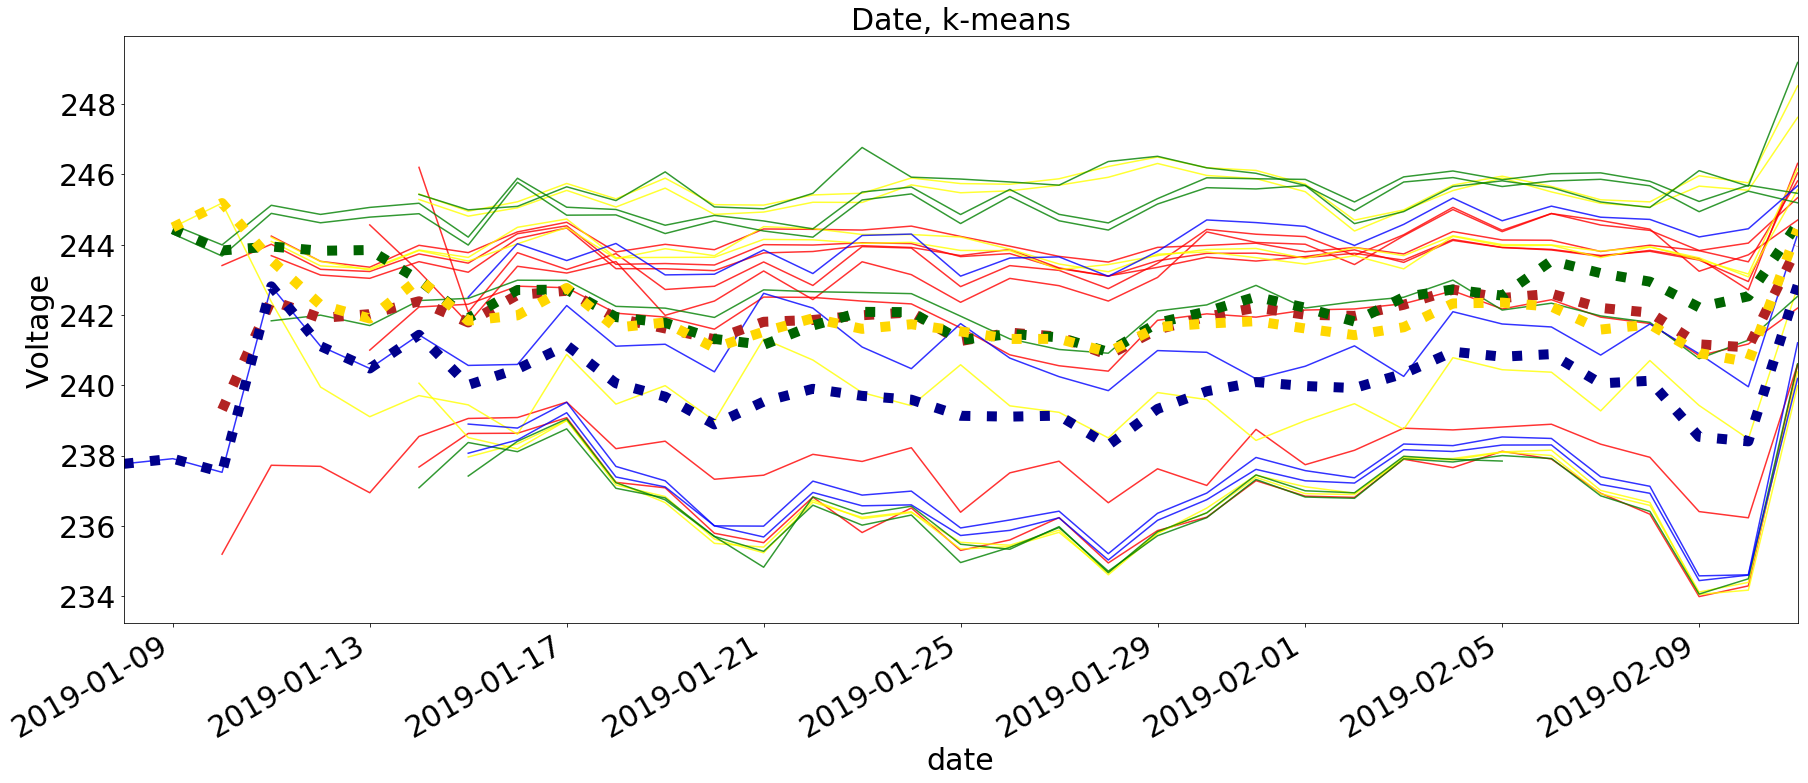

In [82]:
# id_list = group_date['Id'].drop_duplicates().tolist()
color_list = ['red','green','blue', 'yellow', ]
median_list = ['firebrick', 'darkgreen', 'darkblue', 'gold']
fig, ax = plt.subplots(1, 1, figsize = (30, 12))

# plot each id 
for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_kmeans'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line',ax = ax, color= color_list[cluster_index], alpha = 0.8,legend = False, figsize = (30, 12), grid = True, fontsize = 30)

# plot median for 4 clusters
cluster_num = 4
for i in range(cluster_num):
    rows = group_date[group_date['cluster_kmeans'] == i]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = median_list[i], linewidth = 10, ls = ':')

    
plt.title('Date, k-means', fontsize = 30)
plt.xlabel('date', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Hour, k-means

In [36]:
clinski_harabaz_scores = []
cluster_num = range(2, 35)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(data_hour)
    clinski_harabaz_scores.append(metrics.calinski_harabaz_score(data_hour, predict))

In [37]:
clinski_harabaz_scores

[1271.3842121102648,
 1767.9290828650803,
 1738.9858981262835,
 1523.8890137092296,
 1436.4614110206396,
 1352.0090071284096,
 1304.3294492452528,
 1259.689396253451,
 1233.0968784478175,
 1175.9478528929167,
 1178.430244711995,
 1172.228126241335,
 1162.239668388252,
 1160.2616281689086,
 1189.3848399200099,
 1182.4559105652297,
 1228.7063253800034,
 1199.4174516041364,
 1227.0398762999719,
 1201.444596318747,
 1211.000533384369,
 1223.6253209463455,
 1226.0150161429676,
 1218.7772220699323,
 1241.7428590590032,
 1240.834684841215,
 1265.9557156885226,
 1270.1829645094913,
 1271.5160040913206,
 1259.0031405250436,
 1262.2817192601367,
 1310.10087142103,
 1280.7780760619705]

<function matplotlib.pyplot.show(*args, **kw)>

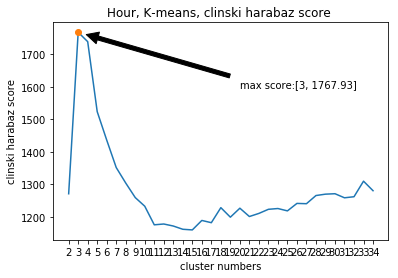

In [39]:
fig = plt.figure()
x = range(2,35)
plt.plot(x, clinski_harabaz_scores)
plt.xlabel('cluster numbers')
plt.xticks(range(2, 35))
plt.ylabel('clinski harabaz score')
plt.title('Hour, K-means, clinski harabaz score ') # scores with different cluster numbers
max_clin = max(clinski_harabaz_scores)
max_clin_index = clinski_harabaz_scores.index(max(clinski_harabaz_scores)) + 2
plt.plot([max_clin_index], [max_clin], 'o')
plt.annotate('max score:[3, 1767.93]', xy = (max_clin_index, max_clin), xytext = (20,1600),
            arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.show

### cluster numbers = 3 is best

In [40]:
kmeans = KMeans(n_clusters = 3, n_jobs = 4)
predict = kmeans.fit_predict(data_hour)

In [41]:
group_hour['cluster_kmeans'] = predict

In [42]:
group_hour.head()

,Id,Hour,Voltage,cluster_kmeans
0,4,0,244.472581,1
1,4,1,245.396561,1
2,4,2,245.148088,1
3,4,3,245.051419,1
4,4,4,244.917742,1


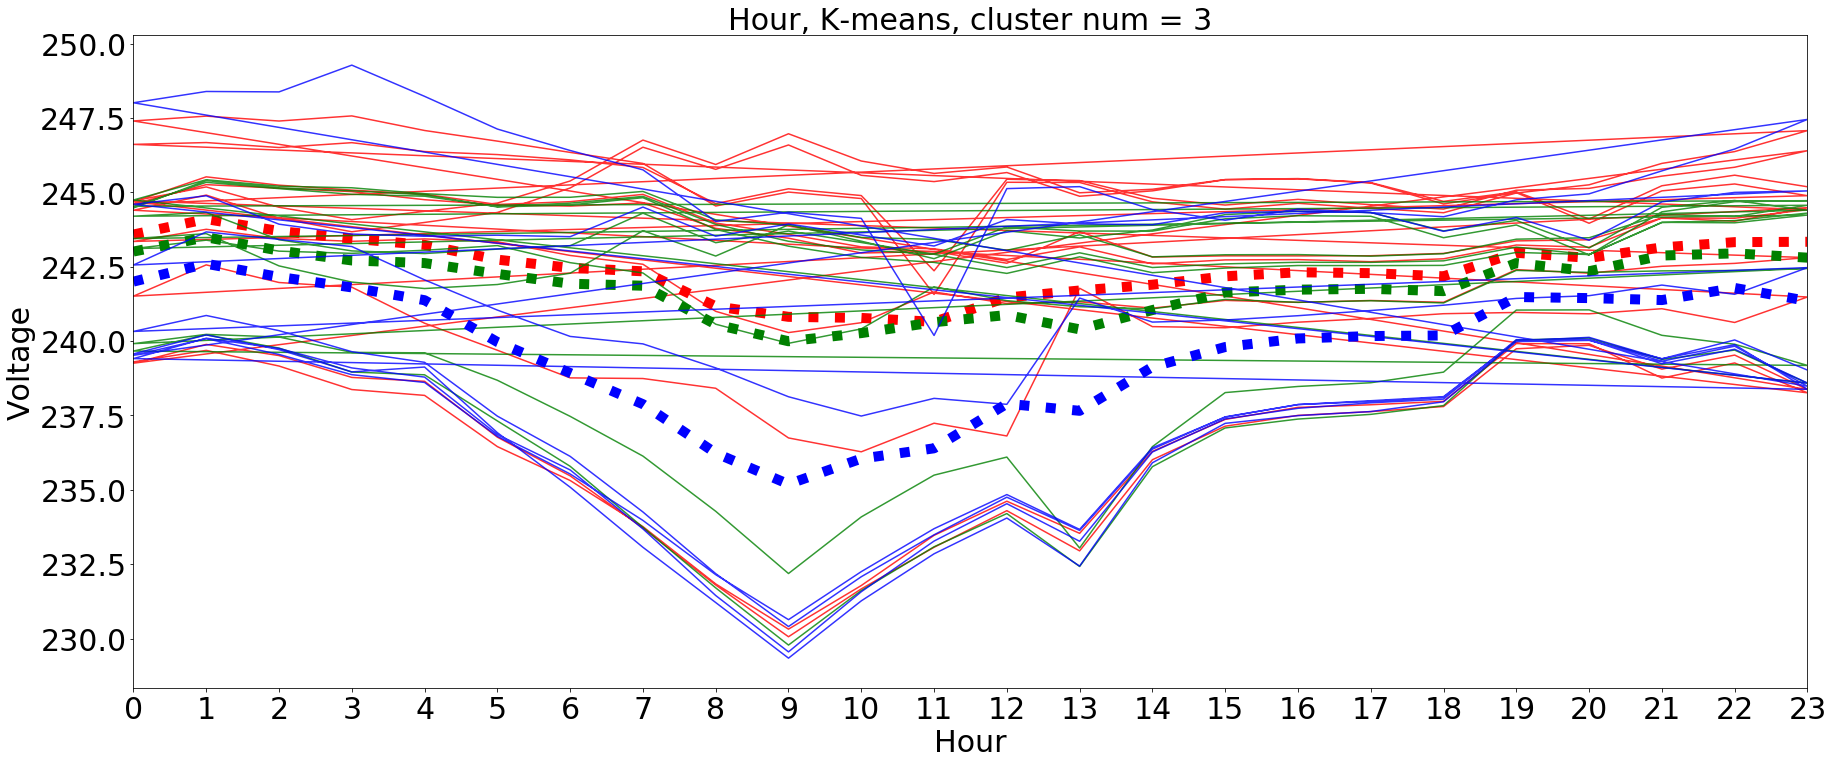

In [44]:
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 3

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_kmeans'] == i]
    rows.plot('Hour', 'Voltage', kind = 'line',ax = ax, color= color_list[i],alpha = 0.8, legend = False, figsize = (30, 12), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = color_list[i], linewidth = 10, ls = ':')

plt.title('Hour, K-means, cluster num = 3', fontsize = 30)
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()
    

# train Date, mean shift

In [45]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [46]:
bandwidth = estimate_bandwidth(data_hour, quantile = 0.2, n_samples = 500)

meanShift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
predict = meanShift.fit_predict(data_train)

In [47]:
group_date['cluster_meanShift'] = predict

In [48]:
group_date['cluster_meanShift'].value_counts()

0    313
1    248
2    199
Name: cluster_meanShift, dtype: int64

In [49]:
group_date.head()

,Id,Voltage,DateTime,cluster_kmeans,cluster_meanShift
0,4,243.687597,2019-01-11,9,1
1,4,243.136206,2019-01-12,9,1
2,4,243.043115,2019-01-13,9,1
3,4,243.517026,2019-01-14,9,1
4,4,243.216423,2019-01-15,9,1


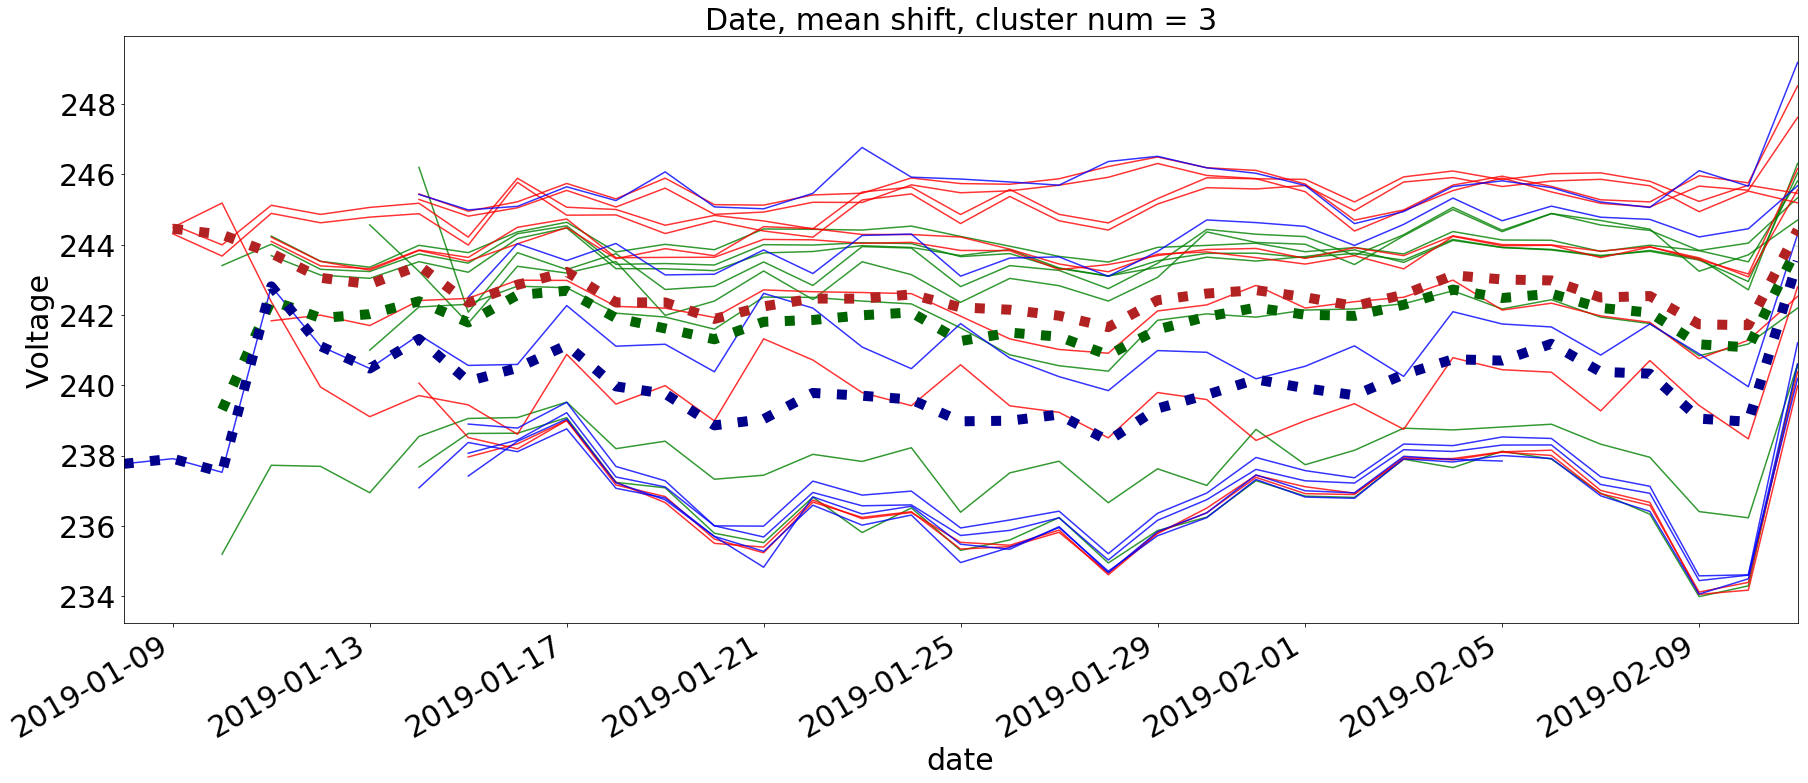

In [51]:
# id_list = group_date['Id'].drop_duplicates().tolist()
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
fig, ax = plt.subplots(1, 1, figsize = (30, 12))

# plot each id 
for i in range(len(id_list)):
    rows = group_date[group_date['Id'] == id_list[i]]
    cluster_index = int(rows['cluster_meanShift'].mode())  
    rows.plot('DateTime', 'Voltage', kind = 'line',ax = ax, color= color_list[cluster_index], alpha = 0.8,legend = False, figsize = (30, 12), grid = True, fontsize = 30)

# plot median for 3 clusters
cluster_num = 3
for i in range(cluster_num):
    rows = group_date[group_date['cluster_meanShift'] == i]
    median = rows.groupby([ 'DateTime'])['Voltage'].mean()
    median.plot(color = median_list[i], linewidth = 10, ls = ':')

    
plt.title('Date, mean shift, cluster num = 3', fontsize = 30)
plt.xlabel('date', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Hour, mean shift

In [52]:
bandwidth = estimate_bandwidth(data_hour, quantile = 0.2, n_samples = 500)

meanShift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
predict = meanShift.fit_predict(data_hour)


In [53]:
group_hour['cluster_meanShift'] = predict

In [54]:
group_hour.head()

,Id,Hour,Voltage,cluster_kmeans,cluster_meanShift
0,4,0,244.472581,1,1
1,4,1,245.396561,1,1
2,4,2,245.148088,1,1
3,4,3,245.051419,1,1
4,4,4,244.917742,1,1


In [55]:
group_hour['cluster_meanShift'].value_counts()

0    264
1    192
2    144
Name: cluster_meanShift, dtype: int64

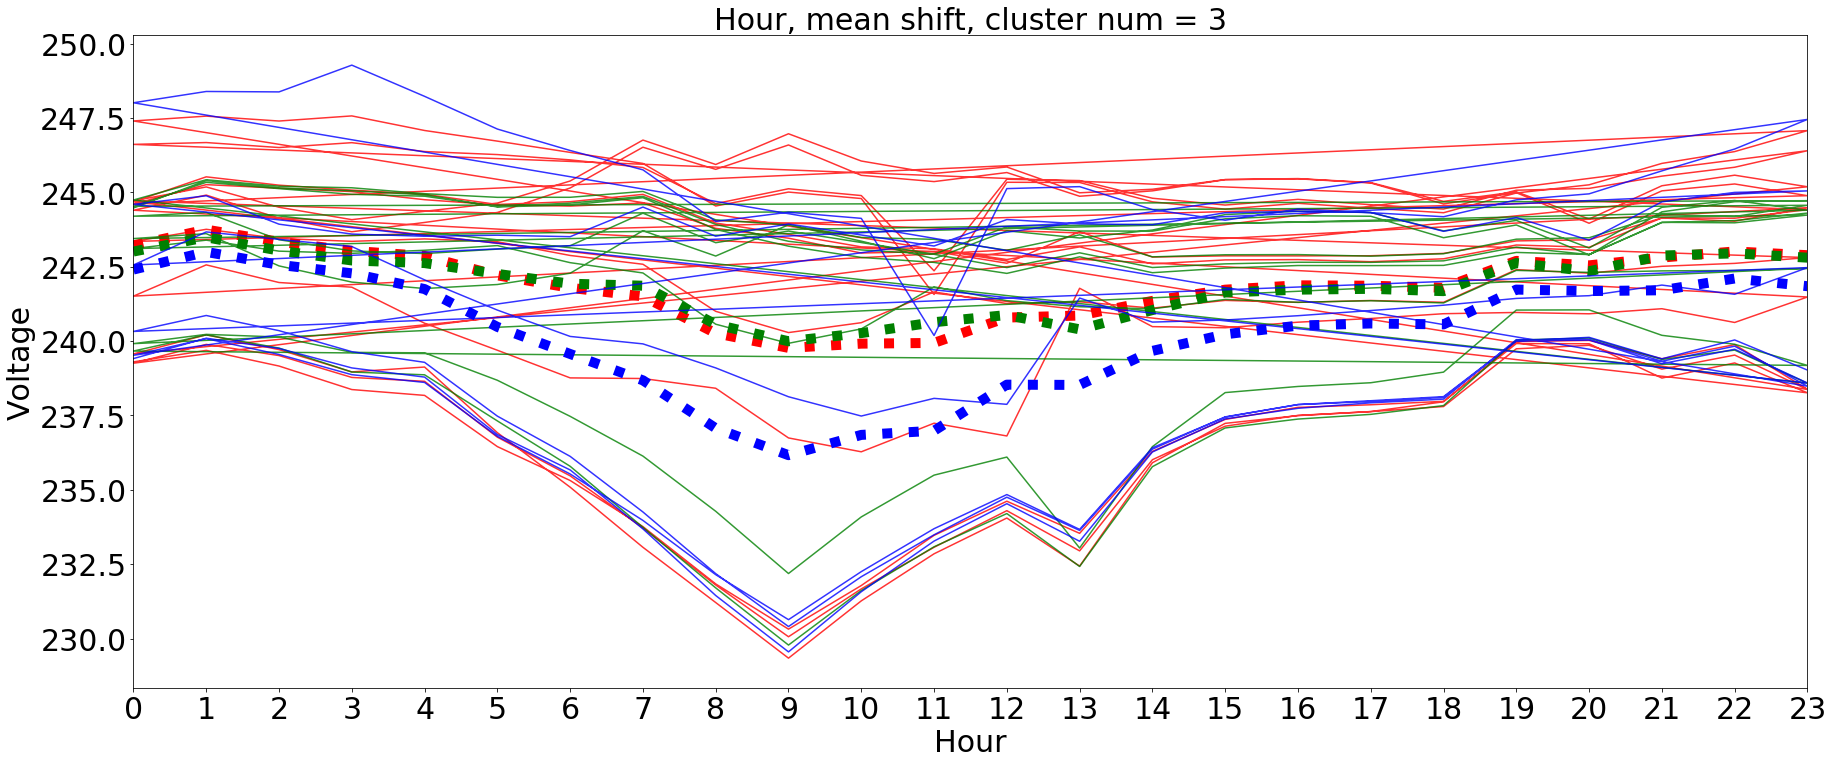

In [57]:
color_list = ['red','green','blue']
median_list = ['firebrick', 'darkgreen', 'darkblue']
cluster_num = 3

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(cluster_num):
    rows = group_hour[group_hour['cluster_meanShift'] == i]
    rows.plot('Hour', 'Voltage', kind = 'line',ax = ax, color= color_list[i],alpha = 0.8, legend = False, figsize = (30, 12), grid = True, xticks = range(0,24), fontsize = 30)
    median = rows.groupby([ 'Hour'])['Voltage'].mean()
    median.plot(color = color_list[i], linewidth = 10, ls = ':')
    
plt.title('Hour, mean shift, cluster num = 3', fontsize = 30)
plt.xlabel('Hour', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)
plt.show()

# train Date, DBSCAN

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
predict = DBSCAN(eps = 0.01, min_samples = 100).fit_predict(data_train)

In [60]:
group_date['cluster_DBSCAN'] = predict

In [61]:
group_date['cluster_DBSCAN'].value_counts()

-1    760
Name: cluster_DBSCAN, dtype: int64

# train Hour, DBSCAN

In [62]:
predict = DBSCAN(eps = 0.0000001, min_samples = 100).fit_predict(data_hour)

In [63]:
group_hour['cluster_DBSCAN'] = predict

In [64]:
group_hour['cluster_DBSCAN'].value_counts()

-1    600
Name: cluster_DBSCAN, dtype: int64